# 1 Numerical convergence (Bulk using GGA-PBE)

- Quantify the convergence of different output values with respect to the energy cutoff 

- Quantify the convergence of different output values with respect to the k-point density 

- Distinguish between convergence of the total energy and a relative energ 


### 1.1.1 Convergence of forces, pressure, total energy and band gap with respect to the energy cutoff

- Using the convergece criterion 

pressure:

$$\frac{\Delta P}{\Delta E_{cutoff}} < \frac{3[KPa]}{50 [eV]}$$


Energy:

  $$\frac{|\Delta E|}{\Delta E_{cutoff}} < \frac{4[meV]}{50 [eV]}$$  


### 1.1.2 Convergence of forces, pressure, total energy and band gap with respect to the energy cutoff 
- Varying one atom in the structure a litle (0.01nm)
- Using the convergece criterion 

pressure:

$$\frac{\Delta P}{\Delta Kpoints} < \frac{3[KPa]}{1}$$


Energy:

  $$\frac{\Delta E_{abs}}{\Delta Kpoints} < \frac{3[meV]}{1}$$  




# Energy cutoff convergence  

In [12]:
import pandas as pd
import numpy as np
# from pandas import DataFrame

PATH_TEXT_FILE = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/energy_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv = pd.read_csv(PATH_TEXT_FILE,delimiter = "\t")

# Visualized
print(read_data_csv)

# Make a matrix with data.csv
matrix_data_vaspout = np.array(read_data_csv)

Maxforces = matrix_data_vaspout[:,0]
Pressure = matrix_data_vaspout[:,2]
energies = matrix_data_vaspout[:,3]
cutoffs = matrix_data_vaspout[:,4]


    MxForce   Drift  Pressure   TOTEN     cutoff
0    0.0508  0.1689   -709.81 -30.179245     200
1    0.0155  0.0462   -402.27 -29.736643     250
2    0.0093  0.0003   -200.21 -29.752315     300
3    0.0048  0.0026    -92.59 -29.755491     350
4    0.0028  0.0001    -33.84 -29.782605     400
5    0.0030  0.0005     -7.00 -29.789359     450
6    0.0030  0.0016     -0.38 -29.781470     500
7    0.0035  0.0010     -0.25 -29.780739     550
8    0.0034  0.0011     -1.26 -29.783580     600
9    0.0034  0.0007     -1.66 -29.787055     650
10   0.0034  0.0007     -1.23 -29.789843     700
11   0.0033  0.0006     -0.51 -29.791190     750
12   0.0033  0.0006      0.20 -29.792180     800
13   0.0033  0.0006      0.75 -29.792503     850
14   0.0034  0.0006      1.07 -29.792619     900
15   0.0034  0.0006      1.21 -29.792687     950


# Relative energy cutoff  convergence

In [13]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/energy_vaspout.csv'
PATH_TEXT_FILE_2 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/energy_relative_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

# read text file into pandas DataFrame
read_data_csv_2 = pd.read_csv(PATH_TEXT_FILE_2,delimiter = "\t")

# Make a matrix with data.csv
matrix_data_vaspout = np.array(read_data_csv_1)
Maxforces = matrix_data_vaspout[:,0]
Pressure = matrix_data_vaspout[:,2]

energies = matrix_data_vaspout[:,3]
cutoffs = matrix_data_vaspout[:,4]

# Make a matrix with data.csv
matrix_data_relative_vaspout = np.array(read_data_csv_2)
relative_Maxforces = matrix_data_relative_vaspout[:,0]
relative_Pressure = matrix_data_relative_vaspout[:,2]
relative_energies = matrix_data_relative_vaspout[:,3]

energies_difference = relative_energies -energies

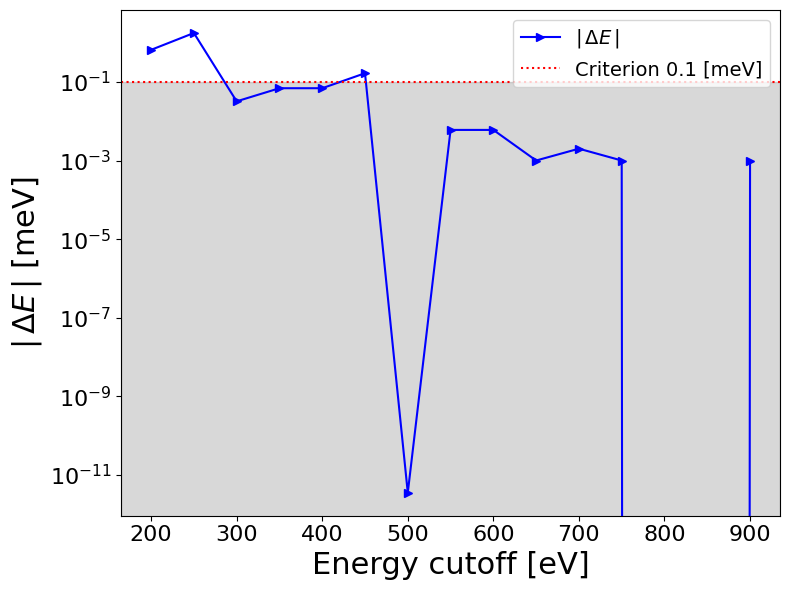

In [14]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_diff_convergence_plot(relative_values=energies_difference,
                                                 cutoff_values=cutoffs,
                                                 conv_criterion= 0.0001,
                                                 #title_name= "Relative energy vs Energy cutoff",
                                                 title_name=None,
                                                 axis_x_name= r"Energy cutoff [eV]",
                                                 axis_y_name= r'$|\,\Delta E \,| $',
                                                 label_relative_values= r'$|\,\Delta E \,| $',
                                                 y_log=True,
                                                 curve_settings ={"color":"blue","marker": ">"})
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/relative_energy_vs_cutoff',dpi=400)

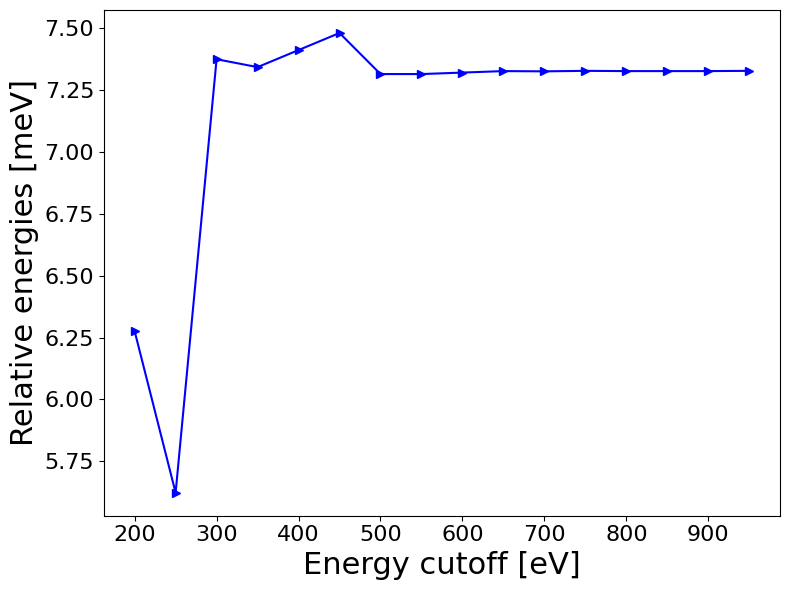

In [15]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_convergence_plot(relative_values=energies_difference,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs Energy cutoff",
                                            title_name=None,
                                            axis_x_name = "Energy cutoff [eV]",
                                            axis_y_name = 'Relative energies',
                                            curve_settings ={"color":"blue","marker": ">"})
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/energy_vs_cutoff',dpi=400)

# Relative k-points density convergence 

In [16]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/kdensity_vaspout.csv'
PATH_TEXT_FILE_2 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/kdensity_relative_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

# read text file into pandas DataFrame
read_data_csv_2 = pd.read_csv(PATH_TEXT_FILE_2,delimiter = "\t")

# Make a matrix with data.csv
matrix_data_vaspout = np.array(read_data_csv_1)
Maxforces = matrix_data_vaspout[:,0]
Pressure = matrix_data_vaspout[:,2]

energies = matrix_data_vaspout[:,3]
cutoffs = matrix_data_vaspout[:,4]

# Make a matrix with data.csv
matrix_data_relative_vaspout = np.array(read_data_csv_2)
relative_Maxforces = matrix_data_relative_vaspout[:,0]
relative_Pressure = matrix_data_relative_vaspout[:,2]
relative_energies = matrix_data_relative_vaspout[:,3]

energies_difference = relative_energies - energies

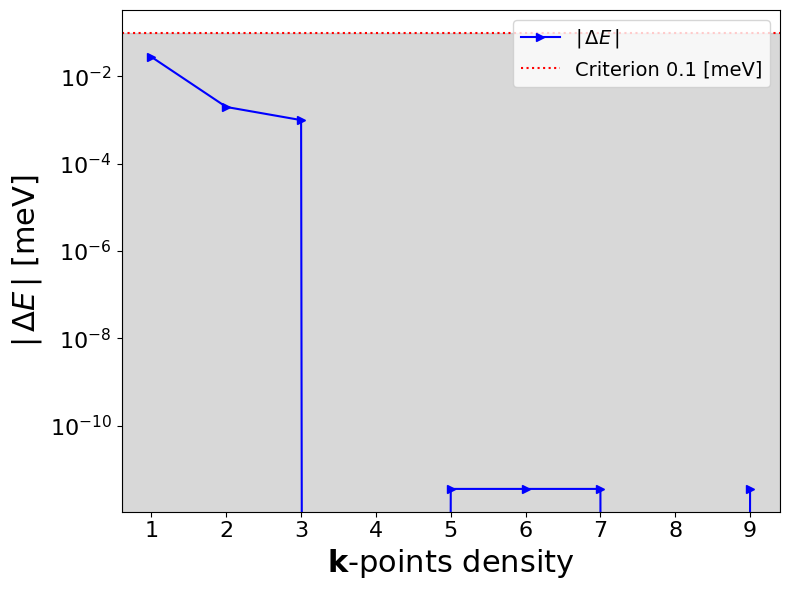

In [17]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_diff_convergence_plot(relative_values=energies_difference,
                                                 cutoff_values=cutoffs,
                                                 conv_criterion= 0.0001,
                                                 #title_name = "Relative energy vs K-Points density",
                                                 title_name=None,
                                                 axis_x_name = r"$\mathbf{k}$-points density",
                                                 axis_y_name = r'$|\,\Delta E \,| $',
                                                 label_relative_values= r'$|\,\Delta E \,| $',
                                                 y_log=True,
                                                 curve_settings ={"color":"blue","marker": ">"})
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/relative_energy_vs_kpoint',dpi=400)

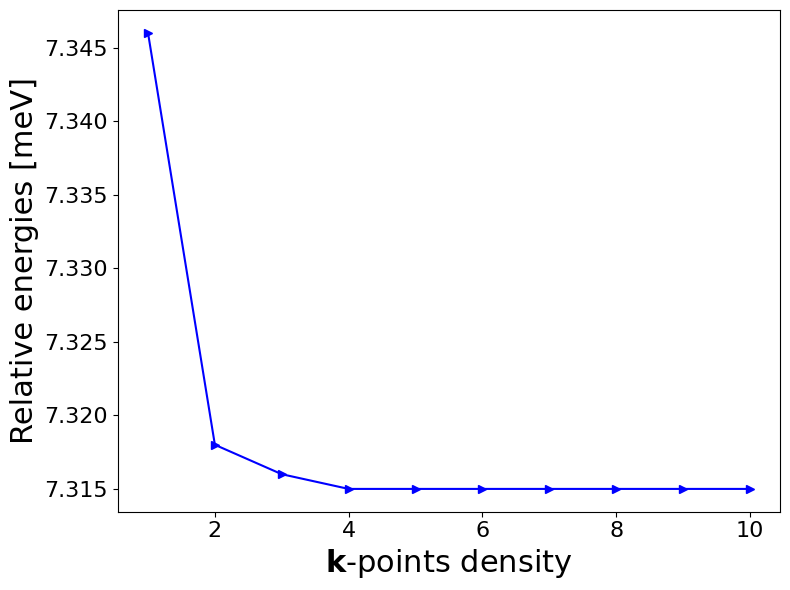

In [18]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_convergence_plot(relative_values=energies_difference,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name=None,
                                            axis_x_name = r"$\mathbf{k}$-points density",
                                            axis_y_name = 'Relative energies',
                                            curve_settings ={"color":"blue","marker": ">"})
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/energy_vs_kpoint',dpi=400)

# Presure and  force convergence 

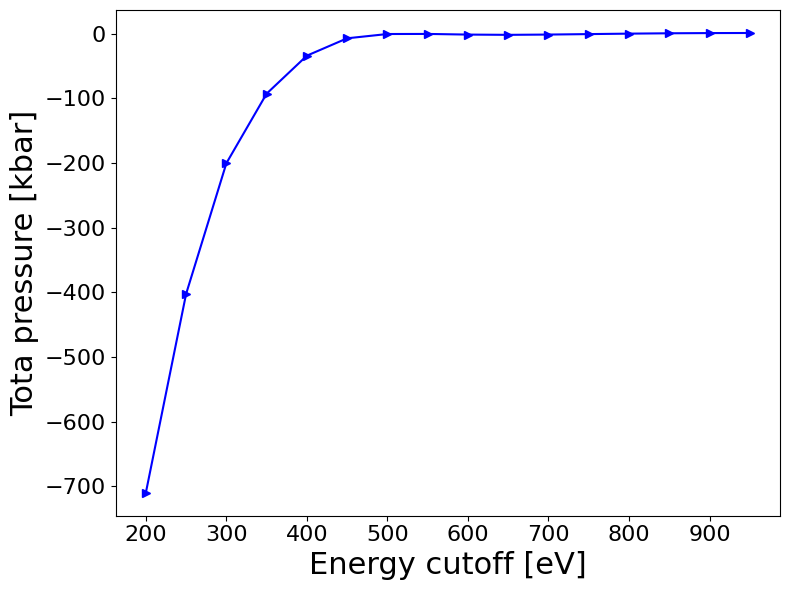

In [19]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

# Make a matrix with data.csv
PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/energy_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

matrix_data_vaspout = np.array(read_data_csv_1)
Pressure = matrix_data_vaspout[:,2]
cutoffs = matrix_data_vaspout[:,4]

plot = ConvergencePlot.get_convergence_plot(relative_values=Pressure,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name = None,
                                            axis_x_name = r"Energy cutoff [eV]",
                                            axis_y_name = r'Tota pressure',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit=r"kbar",
                                            use_SI_prefixes=None
                                            )
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/pressure_vs_energy_cutoff',dpi=400)

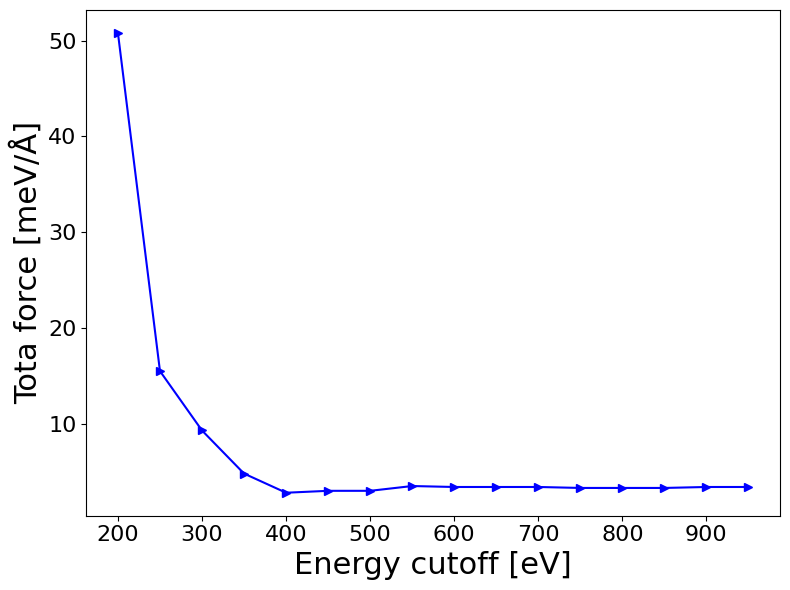

In [21]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

# Make a matrix with data.csv
PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/energy_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

matrix_data_vaspout = np.array(read_data_csv_1)
Maxforces = matrix_data_vaspout[:,0]
cutoffs = matrix_data_vaspout[:,4]

plot = ConvergencePlot.get_convergence_plot(relative_values=Maxforces,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name = None,
                                            axis_x_name = r"Energy cutoff [eV]",
                                            axis_y_name = r'Tota force',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit=r"eV/Å",
                                            #use_SI_prefixes=None
                                            )
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/force_vs_energy_cutoff',dpi=400)

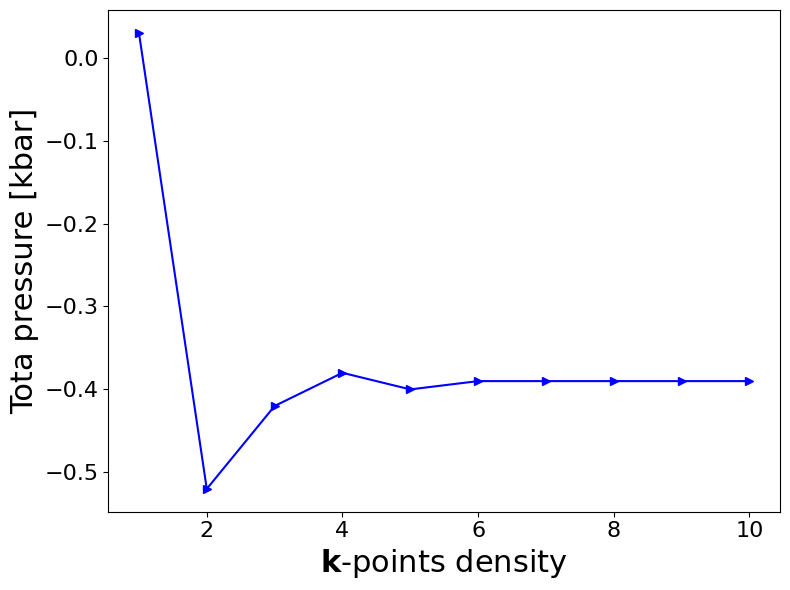

In [23]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

# Make a matrix with data.csv
PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/kdensity_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

matrix_data_vaspout = np.array(read_data_csv_1)
Pressure = matrix_data_vaspout[:,2]
cutoffs = matrix_data_vaspout[:,4]

plot = ConvergencePlot.get_convergence_plot(relative_values=Pressure,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name = None,
                                            axis_x_name = r"$\mathbf{k}$-points density",
                                            axis_y_name = r'Tota pressure',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit=r"kbar",
                                            use_SI_prefixes=None
                                            )
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/pressure_vs_kpoint',dpi=400)

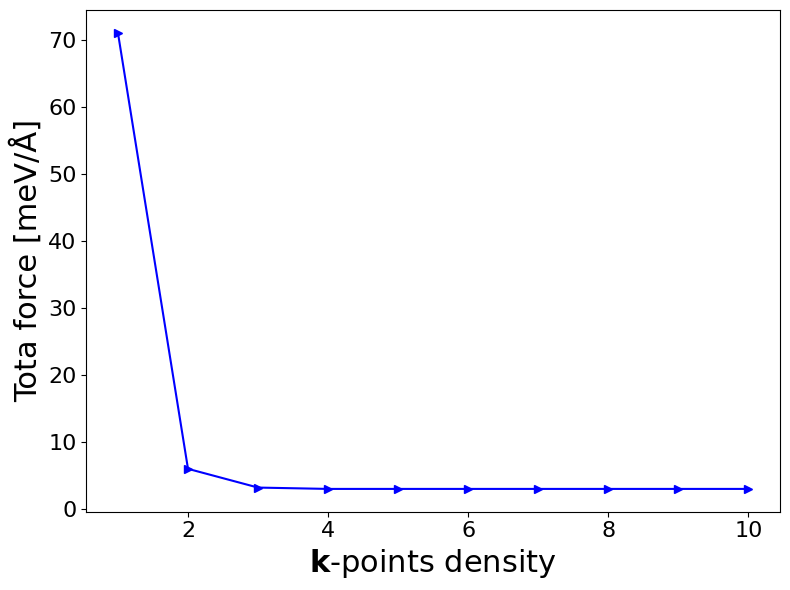

In [24]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

# Make a matrix with data.csv
PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/unitcell/kdensity_vaspout.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

matrix_data_vaspout = np.array(read_data_csv_1)
Maxforces = matrix_data_vaspout[:,0]
cutoffs = matrix_data_vaspout[:,4]

plot = ConvergencePlot.get_convergence_plot(relative_values=Maxforces,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name = None,
                                            axis_x_name = r"$\mathbf{k}$-points density",
                                            axis_y_name = r'Tota force',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit=r"eV/Å",
                                            #use_SI_prefixes=None
                                            )
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/force_vs_kpoint',dpi=400)

## G_0W_0 (NOMEGA)  

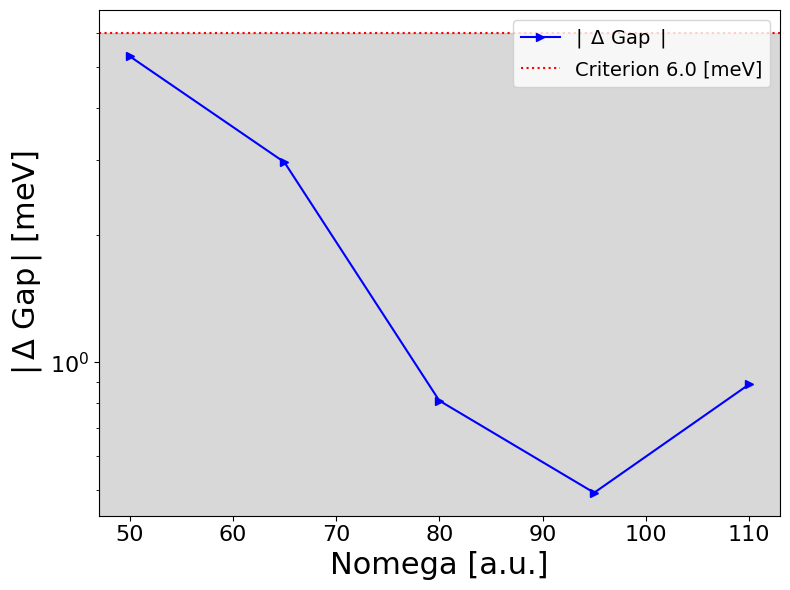

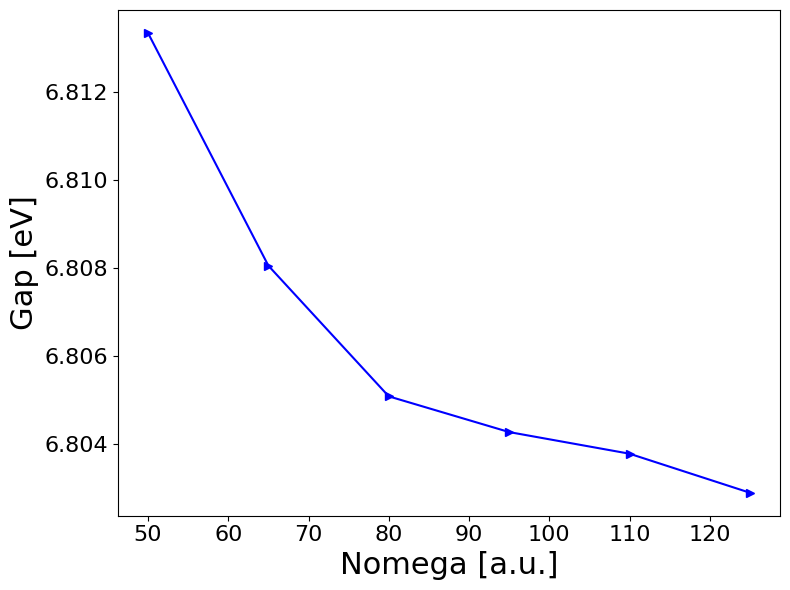

In [25]:
import numpy as np

nomega_values = np.array([50, 65, 80, 95, 110, 125])
gap_values = np.array([6.813349, 6.808059, 6.805089, 6.804277, 6.803785, 6.802898])

from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_diff_convergence_plot(relative_values=gap_values,
                                                 cutoff_values=nomega_values,
                                                 conv_criterion= 0.006,
                                                 #title_name = "Relative energy vs K-Points density",
                                                 title_name=None,
                                                 axis_x_name = r"Nomega [a.u.]",
                                                 axis_y_name = r'$|\,$$\Delta$ Gap$\,|$',
                                                 label_relative_values= r'$|\,$ $\Delta$ Gap $\,|$',
                                                 y_log=True,
                                                 curve_settings ={"color":"blue","marker": ">"})
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/convergence_relative_G0W0_nomega_vs_gap',dpi=400)

plot = ConvergencePlot.get_convergence_plot(relative_values=gap_values,
                                            cutoff_values=nomega_values,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name=None,
                                            axis_x_name = r"Nomega [a.u.]",
                                            axis_y_name = r'Gap',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit="eV",
                                            use_SI_prefixes=None)
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/unitcell/convergence/G0W0_nomega_vs_gap',dpi=400)

# Result

## cutoff convergence value:

### Total energy
* Convergence criterion: 4.0[meV]
* Convergence values: 500

## Relative total energy ($E - E_{\text{move a bit one atom}}$) 
* Convergence criterion: 1.0[meV]
* Convergence values: 300


## kpoint-density convergence value:

### Total energy
* Convergence criterion: 4.0[meV]
* Convergence values: 3


## Relative total energy ($E - E_{\text{move a bit one atom}}$) 
* Convergence criterion: 0.01[meV]
* Convergence values: 2